In [7]:
%run ./constants.ipynb

Exception: File `'./constants.ipynb.py'` not found.

In [6]:
import pandas as pd
import plotly.express as px
import numpy as np
import os
import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import auc

In [ ]:
time_period = "5m"
symbol = "BTCUSDT"
path_to_symbol = os.path.join(output_dir,f"{symbol}-{time_period}",f"{symbol}-{time_period}.csv")


In [ ]:
df = pd.read_csv(path_to_symbol)

In [3]:
df.shape

NameError: name 'df' is not defined

In [80]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,...,PLUS_DM_233,ROC_233,ROCP_233,ROCR_233,ROCR100_233,RSI_233,ATR_233,NATR_233,BETA_233,CORREL_233
0,2021-01-12 12:31:00+05:30,36042.0,36042.0,36042.0,36042.0,0.001,2021-01-12 12:31:59.999000+05:30,36.0420,1,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-12 12:32:00+05:30,36042.0,36042.0,35856.5,35856.5,0.906,2021-01-12 12:32:59.999000+05:30,32546.3687,4,0.905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-12 12:33:00+05:30,35829.1,35843.3,35824.0,35843.3,4.397,2021-01-12 12:33:59.999000+05:30,157547.2001,12,2.849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-12 12:34:00+05:30,35834.3,35848.1,35807.9,35815.6,4.650,2021-01-12 12:34:59.999000+05:30,166610.1238,9,3.636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-12 12:35:00+05:30,35815.5,35939.5,35799.8,35799.8,3.178,2021-01-12 12:35:59.999000+05:30,113854.9888,9,1.870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df.describe()

,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,entry,...,PLUS_DM_233,ROC_233,ROCP_233,ROCR_233,ROCR100_233,RSI_233,ATR_233,NATR_233,BETA_233,CORREL_233
count,1.160203e+06,1.160203e+06,1.160203e+06,1.160203e+06,1.160203e+06,1.160203e+06,1.160203e+06,1.160203e+06,1.160203e+06,1.160202e+06,...,1.159971e+06,1.159970e+06,1.159970e+06,1.159970e+06,1.159970e+06,1.159970e+06,1.159970e+06,1.159970e+06,1.159970e+06,1.159971e+06
mean,3.617440e+04,3.619398e+04,3.615496e+04,3.617429e+04,3.405933e+01,9.223174e+05,3.647776e+02,1.706939e+01,4.616290e+05,3.617430e+04,...,2.410611e+03,7.139724e-03,7.139724e-05,1.000071e+00,1.000071e+02,5.008131e+01,4.042383e+01,1.061714e-01,4.951961e-01,9.794549e-01
std,1.405442e+04,1.406277e+04,1.404590e+04,1.405434e+04,8.220915e+01,1.902812e+06,6.206618e+02,4.281158e+01,9.916059e+05,1.405434e+04,...,1.752507e+03,1.532709e+00,1.532709e-02,1.532709e-02,1.532709e+00,2.969395e+00,3.095167e+01,7.228701e-02,1.534410e-01,2.155153e-02
min,1.547620e+04,1.551160e+04,1.535970e+04,1.547560e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.547560e+04,...,2.564610e+01,-2.801093e+01,-2.801093e-01,7.198907e-01,7.198907e+01,2.342555e+01,3.625995e-01,2.140986e-03,-1.039432e+00,3.109917e-01
25%,2.218440e+04,2.219710e+04,2.217320e+04,2.218440e+04,2.823000e+00,9.985973e+04,6.900000e+01,9.730000e-01,3.403229e+04,2.218440e+04,...,1.081080e+03,-6.046700e-01,-6.046700e-03,9.939533e-01,9.939533e+01,4.830244e+01,1.726794e+01,6.324668e-02,4.016536e-01,9.740624e-01
50%,3.663020e+04,3.666110e+04,3.660100e+04,3.662980e+04,1.165900e+01,3.896783e+05,2.080000e+02,5.072000e+00,1.744975e+05,3.662985e+04,...,2.100656e+03,5.373943e-03,5.373943e-05,1.000054e+00,1.000054e+02,5.005166e+01,3.557553e+01,9.252848e-02,5.024530e-01,9.842372e-01
75%,4.722000e+04,4.724390e+04,4.719750e+04,4.721975e+04,3.357800e+01,9.877312e+05,4.330000e+02,1.652000e+01,4.949239e+05,4.721978e+04,...,3.333348e+03,6.104192e-01,6.104192e-03,1.006104e+00,1.006104e+02,5.177816e+01,5.633006e+01,1.311522e-01,5.968982e-01,9.908451e-01
max,6.914110e+04,6.917780e+04,6.888690e+04,6.914100e+04,4.146987e+03,9.168269e+07,7.791400e+04,2.683941e+03,4.797964e+07,6.914100e+04,...,2.083018e+04,3.900760e+01,3.900760e-01,1.390076e+00,1.390076e+02,7.862412e+01,5.432945e+02,1.584356e+00,3.591579e+00,9.993207e-01


In [82]:
df.select_dtypes(include="object")

,open_time,close_time
0,2021-01-12 12:31:00+05:30,2021-01-12 12:31:59.999000+05:30
1,2021-01-12 12:32:00+05:30,2021-01-12 12:32:59.999000+05:30
2,2021-01-12 12:33:00+05:30,2021-01-12 12:33:59.999000+05:30
3,2021-01-12 12:34:00+05:30,2021-01-12 12:34:59.999000+05:30
4,2021-01-12 12:35:00+05:30,2021-01-12 12:35:59.999000+05:30
...,...,...
1160198,2023-04-01 05:25:00+05:30,2023-04-01 05:25:59.999000+05:30
1160199,2023-04-01 05:26:00+05:30,2023-04-01 05:26:59.999000+05:30
1160200,2023-04-01 05:27:00+05:30,2023-04-01 05:27:59.999000+05:30
1160201,2023-04-01 05:28:00+05:30,2023-04-01 05:28:59.999000+05:30


In [83]:
df.drop(["open_time", "close_time"], axis=1, inplace=True)

In [84]:
column_names = df.columns


missing_df = pd.DataFrame({
    "name" : column_names,
    "missing": df.isnull().mean().tolist()
}, columns=["name", "missing"])

missing_df["missing"] = missing_df["missing"] * 100

missing_df.sort_values("missing", ascending=False, inplace=True)


In [85]:
missing_df[:10]

,name,missing
19,entered_before,99.888037
17,longs_win_after,67.039389
16,shorts_win_after,66.281590
559,ADXR_233,0.060076
555,TEMA_233,0.059990
523,ADXR_200,0.051543
519,TEMA_200,0.051457
558,ADX_233,0.040079
548,DEMA_233,0.039993
487,ADXR_144,0.037062


In [86]:
df.drop(["entered_before", "longs_win_after", "shorts_win_after"], axis=1, inplace=True)

In [87]:
df.replace(np.nan, -500, inplace=True)

In [88]:
df.if_long.value_counts()

-1    777608
 1    382410
 0       185
Name: if_long, dtype: int64

In [89]:
df["if_long"] = df["if_long"].replace(-1, 0)

In [90]:
df.if_long.value_counts()

0    777793
1    382410
Name: if_long, dtype: int64

In [91]:
df["if_short"] = df["if_short"].replace(-1, 0)

In [92]:
df.if_short.value_counts()

0    769001
1    391202
Name: if_short, dtype: int64

### Long model

In [93]:
long_df = df.drop("if_short", axis=1)

In [94]:
long_y = df["if_long"]

In [95]:
long_x = long_df.drop("if_long", axis=1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(long_x, long_y, test_size=0.1)

In [ ]:
# long_x.columns.tolist()

In [ ]:
# columns_to_drop = ['open',
#  'high',
#  'low',
#  'close',
#  'volume',
#  'quote_volume',
#  'count',
#  'taker_buy_volume',
#  'taker_buy_quote_volume']

In [ ]:
# long_x.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [97]:
long_clf = RandomForestClassifier(max_depth=100, random_state=0)

In [98]:
long_clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=100, random_state=0)

## Save model

In [99]:
import pickle

# Save the model to a file
with open("long_clf_08041m.pkl", "wb") as f:
    pickle.dump(long_clf, f)

## Load  model

In [45]:
# Load the saved model from a file
with open("long_clf_08041m.pkl", "rb") as f:
    long_clf = pickle.load(f)

In [100]:
y_pred = long_clf.predict(X_test)

In [101]:
long_clf.score(X_test, y_test)

0.9164547797381508

In [102]:
long_clf.classes_

array([0, 1], dtype=int64)

In [103]:
cm = confusion_matrix(y_test, y_pred, labels=long_clf.classes_)

In [104]:
cm

array([[76411,  1089],
       [ 8604, 29917]], dtype=int64)

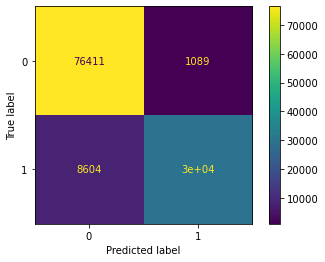

In [105]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=long_clf.classes_)

disp.plot()


In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     77500
           1       0.96      0.78      0.86     38521

    accuracy                           0.92    116021
   macro avg       0.93      0.88      0.90    116021
weighted avg       0.92      0.92      0.91    116021



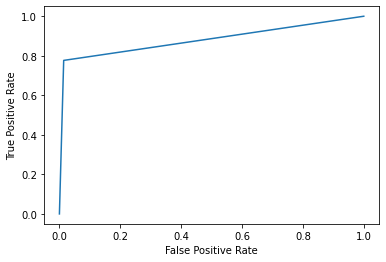

In [107]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=long_clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [108]:
auc(fpr, tpr)

0.8812948498138009

### Short model

In [33]:
short_df = df.drop("if_long", axis=1)

In [34]:
short_y = df["if_short"]

In [35]:
short_x = short_df.drop("if_short", axis=1)

In [36]:
short_x.shape

(340963, 576)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(short_x, short_y, test_size=0.1)

In [38]:
short_clf = RandomForestClassifier(max_depth=100, random_state=0)

In [39]:
short_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, random_state=0)

In [ ]:
# Save the model to a file
with open("short_clf.pkl", "wb") as f:
    pickle.dump(short_clf, f)

In [40]:
y_pred = short_clf.predict(X_test)

In [41]:
short_clf.score(X_test, y_test)

0.8051148194855853

In [42]:
short_clf.classes_

array([0, 1], dtype=int64)

In [43]:
cm = confusion_matrix(y_test, y_pred, labels=short_clf.classes_)

In [44]:
cm

array([[16614,  2382],
       [ 4263, 10838]], dtype=int64)

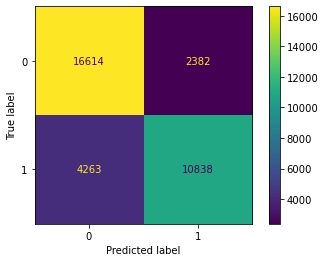

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=short_clf.classes_)

disp.plot()


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     18996
           1       0.82      0.72      0.77     15101

    accuracy                           0.81     34097
   macro avg       0.81      0.80      0.80     34097
weighted avg       0.81      0.81      0.80     34097



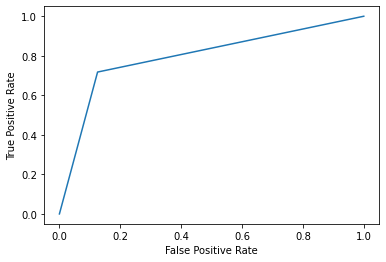

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=short_clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [48]:
auc(fpr, tpr)

0.7961529972767488

### Testing

In [109]:
btc_df = pd.read_csv(path_daily)

In [110]:
btc_df.shape

(36000, 583)

In [111]:
btc_df["open_time"] = pd.to_datetime(btc_df["open_time"])
btc_df["close_time"] = pd.to_datetime(btc_df["close_time"])

In [112]:
btc_df.open_time

0       2023-04-01 05:30:00+05:30
1       2023-04-01 05:31:00+05:30
2       2023-04-01 05:32:00+05:30
3       2023-04-01 05:33:00+05:30
4       2023-04-01 05:34:00+05:30
                   ...           
35995   2023-04-26 05:25:00+05:30
35996   2023-04-26 05:26:00+05:30
35997   2023-04-26 05:27:00+05:30
35998   2023-04-26 05:28:00+05:30
35999   2023-04-26 05:29:00+05:30
Name: open_time, Length: 36000, dtype: datetime64[ns, pytz.FixedOffset(330)]

In [ ]:
# btc_df = btc_df[(btc_df['open_time'] > '2023-01-17') & (btc_df['open_time'] < '2023-01-18')]

In [ ]:
# Drop columns

# btc_df.drop(["open_time", "close_time", 'open',
#  'high',
#  'low',
#  'close',
#  'volume',
#  'quote_volume',
#  'count',
#  'taker_buy_volume',
#  'taker_buy_quote_volume', "entered_before", "longs_win_after", "shorts_win_after"], axis=1, inplace=True)

In [113]:
btc_df.shape

(36000, 583)

In [114]:
btc_df = btc_df[1:]

In [115]:
btc_df.replace(np.nan, -500, inplace=True)

In [116]:
btc_df["if_short"].value_counts()

-1    23243
 1    12663
 0       93
Name: if_short, dtype: int64

In [117]:
btc_df["if_short"] = btc_df["if_short"].replace(-1, 0)

In [118]:
btc_df["if_short"].value_counts()

0    23336
1    12663
Name: if_short, dtype: int64

In [119]:
btc_df["if_long"] = btc_df["if_long"].replace(-1, 0)

In [120]:
short_y_act = btc_df["if_short"]
long_y_act = btc_df["if_long"]

In [121]:
btc_df.drop([
    "if_long", "if_short", 'entered_before', 'longs_win_after',
    'shorts_win_after', 
    'open_time', 'close_time'
],
            axis=1,
            inplace=True)

In [61]:
short_y_pred = short_clf.predict(btc_df)

In [122]:
def accuracy(y_act, y_pred):
    correct = 0
    for i in range(len(y_act)):
        if y_act[i] == y_pred[i]:
            correct += 1
    return (correct / len(y_act)) * 100


In [65]:
accuracy(list(short_y_act), list(short_y_pred)) 

56.61688086141021

In [123]:
long_y_pred = long_clf.predict(btc_df)

In [124]:
accuracy(list(long_y_act), list(long_y_pred)) 

59.84055112642018

In [73]:
long_y_act

1       1
2       1
3       1
4       0
5       1
       ..
7195    0
7196    0
7197    0
7198    0
7199    0
Name: if_long, Length: 7199, dtype: int64

In [74]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(short_clf, short_x, short_y, cv=5)

NameError: name 'short_clf' is not defined

In [71]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.63 (+/- 0.05)


In [125]:
scores = cross_val_score(long_clf, long_x, long_y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.61 (+/- 0.11)
